In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow import keras

In [278]:
# Cargamos el dataset
dataset = pd.read_csv('wine.data', header=None,skiprows=1)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [279]:
#  Ahora vamos a separar los datos de entrenamiento y los datos de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, 1:], dataset.iloc[:, 0], test_size=0.2, random_state=0)

len(dataset),len(X_train),len(X_test)

(178, 142, 36)

In [280]:
y_train.head()

161    3
92     2
94     2
174    3
24     1
Name: 0, dtype: int64

In [281]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
161,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495
94,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845


In [282]:
# X_train = np.array(X_train)
# y_train = np.array(y_train)

In [353]:
model = Sequential([
    Dense(13, activation="sigmoid", input_shape=(13,)),
    Flatten(),
    Dense(2, activation="sigmoid"),
    Dense(4, activation="sigmoid"),
    Dense(8, activation="sigmoid"),
    Dense(1024, activation="sigmoid"),
    Dense(1, activation="sigmoid")
])

In [367]:
# Probaremos varios optimizadores
# model.compile(optimizer=("sgd", "rmsprop", "adagrad", "adadelta", "adam", "adamax", "nadam"),
model.compile(optimizer=("nadam"),
              loss="mean_squared_error",
              metrics=["accuracy"])

In [368]:
history_small_model=model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
3/3 [==============================] - 3s 4ms/step - loss: 1.5705 - accuracy: 0.3169
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5704 - accuracy: 0.3169
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5704 - accuracy: 0.3169
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5704 - accuracy: 0.3169
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 1.5704 - accuracy: 0.3169
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 1.5704 - accuracy: 0.3169
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5704 - accuracy: 0.3169
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5704 - accuracy: 0.3169
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 1.5704 - accuracy: 0.3169
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5704 - accuracy: 0.3169
Epoch 11/100
3/3 [===========

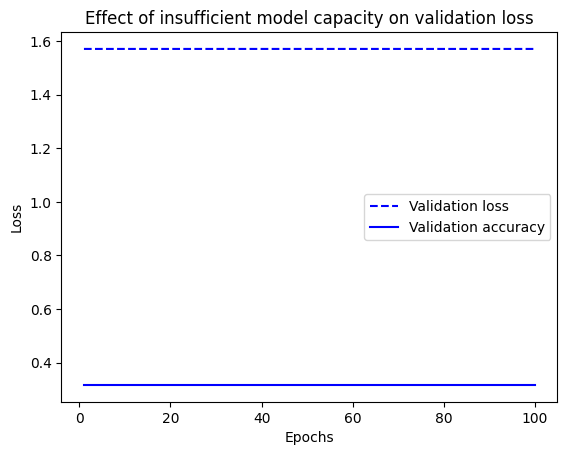

In [369]:
val_loss = history_small_model.history["loss"]
epochs = range(1, 101)
val_acc = history_small_model.history["accuracy"]

plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.plot(epochs,val_acc, "b",label="Validation accuracy")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()